# SNOW Network Extraction

The SNOW algorithm, [published in Physical Review E](https://doi.org/10.1103/PhysRevE.96.023307), uses a marker-based watershed segmentation algorithm to partition an image into regions belonging to each pore.  The main contribution of the SNOW algorithm is to find a suitable set of initial markers in the image so that the watershed is not over-segmented.  SNOW is an acronym for Sub-Network of an Over-segmented Watershed.  This code works on both 2D and 3D images.  In this example a 2D image will be segmented using the predefined ``snow`` function in PoreSpy. 

Start by importing the necessary packages:

In [1]:
import porespy as ps
import scipy as sp
import matplotlib.pyplot as plt
import openpnm as op

Generate an artificial 2D image for illustration purposes:

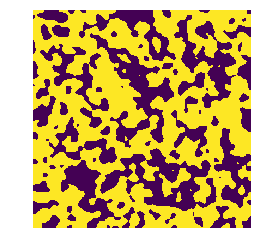

In [2]:
im = ps.generators.blobs(shape=[400, 400], porosity=0.6, blobiness=2)
plt.imshow(im)
plt.axis('off')
plt.show()

SNOW is composed of a series of filters, but PoreSpy has a single function that applies all the necessary steps:

In [3]:
snow_output = ps.networks.snow(im,
                               voxel_size=1,
                               boundary_faces=['left','right','front','back','top','bottom'],
                               marching_cubes_area=False)

____________________________________________________________
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  237
Peaks after trimming saddle points:  201
Peaks after trimming nearby peaks:  195
____________________________________________________________
Extracting pore and throat information from image


100%|██████████████████████████████████████████████████████████████████████████████| 237/237 [00:00<00:00, 1417.87it/s]


The ``snow`` function returns a python *dict* that is suitable for use in OpenPNM.

In [4]:
pn = op.network.GenericNetwork()
pn.update(snow_output)
prj = pn.project

OpenPNM has the ability to output network to a VTK file suitable for view in Paraivew:

In [5]:
prj.export_data(filename='extraction', filetype='vtk')

Finally, to overlay the image and the network it is necessary to rotate the image. PoreSpy offers a tool for this:

In [6]:
im = ps.tools.align_image_with_openpnm(im)
ps.io.to_vtk(sp.array(im, dtype=int)[:, :, sp.newaxis], 'im.tif')

And the result after opening both files in ParaView is:

![](https://i.imgur.com/Zivig0U.png)